## Finding Best Markets to Advertize for an EduTech Company

An edutech company offers courses on programming. Most of the courses are on web and mobile development, but many other areas are also covered like data science, game development, etc. Company wants to select a few countries (markets) to advertise their available courses. 

We will work on behalf of this edutech company and aim to find out the best markets for company to advertise in.  
To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable conclusions.  

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses in various areas like web and mobile development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new learners with varying interests, which is ideal for the purpose of our analysis. This survey data is publicly available in their GitHub repository.

### Outline
1) Reading and Understanding Data

2) Exploring Data
- Analyzing Job Role Interest
- Top 10 countires where participants live
- Spending Money for Learning
- Examining Outliers for US
- Examining Outliers for India
- Examining Outliers for Canada

3) Conclusion - Selecting the Best Markets

<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

### Reading and Understanding Data

In [78]:
import numpy as np

import pandas as pd
pd.set_option('max_rows', 150)   
pd.set_option('max_columns', 150)
pd.set_option('precision', 2)   # round to two decimal points
pd.set_option('float_format', '{:,.2f}'.format)   # suppress scientific notation globally

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell   # print multiple outputs from single cell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [81]:
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)
fcc_survey.shape

(18175, 136)

In [82]:
fcc_survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.00,0.00,nan,nan,NaN,nan,nan,more than 1 million,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,nan,nan,nan,female,NaN,nan,1.00,0.00,1.00,0.00,0.00,0.00,nan,15.00,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,nan,nan,0.00,0.00,0.00,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,start your own business,nan,NaN,NaN,English,married or domestic partnership,150.00,6.00,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,nan,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,1.00,nan,nan,nan,1.00,nan,NaN,nan,nan,nan,nan,nan,1.00,1.00,"some college credit, no degree",NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1,34.00,0.00,nan,nan,NaN,nan,nan,"less than 100,000",nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,"35,000.00",nan,nan,male,NaN,nan,1.00,0.00,1.00,0.00,0.00,1.00,nan,10.00,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,nan,0.00,0.00,0.00,nan,Within 7 to 12 months,nan,nan,nan,nan,nan,1.00,nan,nan,nan,NaN,nan,nan,nan,work for a nonprofit,1.00,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.00,6.00,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,nan,1.00,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,1.00,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,1.00,nan,nan,1.00,1.00,"some college credit, no degree",NaN,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan
2,21.00,0.00,na

In [83]:
fcc_survey.isnull().sum().sort_values().head(136)

Part1StartTime                       0
NetworkID                            0
Part1EndTime                         0
ID.x                                 0
IsSoftwareDev                      107
AttendedBootcamp                   466
MonthsProgramming                 1091
HoursLearning                     1461
MoneyForLearning                  1598
Part2StartTime                    2432
Part2EndTime                      2432
ID.y                              2432
Gender                            2721
CountryCitizen                    2793
HasHighSpdInternet                2795
SchoolDegree                      2807
Age                               2808
CityPopulation                    2821
LanguageAtHome                    2831
CountryLive                       2839
MaritalStatus                     2840
HasFinancialDependents            2846
IsEthnicMinority                  2882
HasDebt                           2884
HasServedInMilitary               2919
IsReceiveDisabilitiesBene

We do not need all the columns for our analysis, and considering that more than 80% of columns have 10000+ values missing out of 18175 records, we will select few columns without too mnay missing values, which would be useful for analysis and to arrive at a decision.

In [84]:
# Useful columns for analysis
cols = ['Age','Gender','CountryLive','AttendedBootcamp','EmploymentStatus','JobRoleInterest','HoursLearning','MoneyForLearning','MonthsProgramming',]
fcc = fcc_survey[cols].copy()

In [85]:
fcc.describe()

,Age,AttendedBootcamp,HoursLearning,MoneyForLearning,MonthsProgramming
count,"15,367.00","17,709.00","16,714.00","16,577.00","17,084.00"
mean,27.69,0.06,15.61,957.30,20.79
std,8.56,0.24,15.28,"5,003.00",41.72
min,0.00,0.00,0.00,0.00,0.00
25%,22.00,0.00,5.00,0.00,3.00
50%,26.00,0.00,10.00,10.00,9.00
75%,32.00,0.00,20.00,200.00,24.00
max,90.00,1.00,168.00,"210,000.00",744.00


*Some initial observations*  
- Average age is ~27.  
- Average no of hours spent on learning per month is ~15.  
- Average prograaming experience is 20 months.  
- 75% of particpants are under age 32 and with 2 years of programming experience.
- We do see some outliers as well - records where Age is 0 or 90, Programming experience being 744 months (that's 62 years !!), MoneyForLearning is 200000+ USD. To be fair it is not entirely clear from the name itself what is meant to be filled here, and it is easy to be confuse it with money spent on one's college education

### Exploring Data

For the purpose of our analysis, we want to answer questions about participants that are interested in the subjects we teach. We'd like to know:

- Where are these participants located  
- Which markets have the greatest densities of people interested in learning these subjects  
- How much money particpants have spent or willing to spend on e-learning.

We will start by exploring the Job Roles, participants are interested in. This is important as this will tell us whether this set of participants could be be interested in courses offered by us.

#### Analyzing Job Role Interest

In [18]:
fcc['JobRoleInterest'].value_counts(normalize=True).sort_values(ascending=False).head(10)*100

Full-Stack Web Developer                              11.77
  Front-End Web Developer                              6.44
  Data Scientist                                       2.17
Back-End Web Developer                                 2.03
  Mobile Developer                                     1.67
Game Developer                                         1.63
Information Security                                   1.32
Full-Stack Web Developer,   Front-End Web Developer    0.92
  Front-End Web Developer, Full-Stack Web Developer    0.80
  Product Manager                                      0.79
Name: JobRoleInterest, dtype: float64

*Observations*  

We see most of the particpants are interested in web development (full-stack, front-end and back-end web development).  
A few people are interested in mobile development.
A few people are interested in domains other than web and mobile development.

Also, note that the top preference is only 11% which seems pretty low, but this is due to the fact that multiple preferences are allowed and also these can be in any order for eg. we see (Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer) mentioned.

Since our focus is adverstising Web and Mobile development course, we can find no of all such roles which have either Web Developer or Mobile Developer in them.

True    86.24
False   13.76
Name: JobRoleInterest, dtype: float64


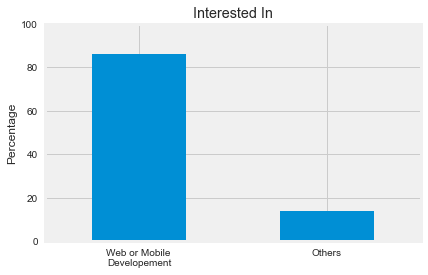

In [89]:
# Finding count with interest in Web or Mobile Development
fcc_web_mobile = fcc['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer') 

web_mobile_count = fcc_web_mobile.value_counts(normalize=True)*100
print(web_mobile_count)

# Plotting interest percentages
web_mobile_count.plot.bar()
plt.xticks([0,1],['Web or Mobile \nDevelopement','Others'], rotation=0)
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.title('Interested In');

Out of all the participants who have mentioned their interest, a good 86% are interested in Web or Mobile Developer roles, which presents a great opportunity for us to advertise relevant courses. So, this survey has the right category of people for our purpose.

Now, let's find out where our survey participants are located, and in what numbers.  
This should be a good start for finding out the best markets to run our ads campaign in.

#### Top 10 countries where participants live

In [90]:
fcc_countries = fcc[fcc['JobRoleInterest'].notnull()].copy()

learner_count = fcc_countries['CountryLive'].value_counts().head(10)
learner_percentage = fcc_countries['CountryLive'].value_counts(normalize=True).head(10)*100

pd.DataFrame(data = {'Count':learner_count, 'Percentage':learner_percentage})

,Count,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


*Observations*
- 45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market.  
- India has the second highest customer density but it's just 7.7%.  
- United Kingdom at 4.6% and Canada at 3.8%, takes the third and fourth place respectively

Overall, more than 60% of learners live in ['United States of America','India','United Kingdom','Canada'], so we narrow down our analysis to only these four countries.

Also, our courses are in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

In [99]:
fcc4 = fcc_countries[fcc_countries['CountryLive'].isin(['United States of America','India','United Kingdom','Canada'])].copy()

Now, we can analyze the amount of money participants in each of these countries are willing to spend

#### Spending Money for Learning

The MoneyForLearning column describes in USD, the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells monthly subscriptions at a price of $60, and for this reason we're interested in finding out how much money each student spends per month.

So, we wil create a new column that describes the amount of money a student has spent per month so far, which will be To do  MoneyForLearning column divided by the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months, it might be that they have just started and this is the first month and so to avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [102]:
fcc4 = fcc4[fcc4['CountryLive'].notnull()]

fcc4['MonthsProgramming'].replace(0,1,inplace=True)

fcc4['MoneyPerMonth'] = fcc4['MoneyForLearning']/fcc4['MonthsProgramming']

fcc4 = fcc4[fcc4['MoneyPerMonth'].notnull()]

In [103]:
fcc4.shape

(3915, 10)

In [120]:
fcc4.groupby('CountryLive')['MoneyPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America   138.98
Canada                      83.64
India                       65.76
United Kingdom              45.53
Name: MoneyPerMonth, dtype: float64

The results for the United Kingdom and Canada are a bit surprising compared to the values we see for India. If we consider a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It could be that not enough people from UK and Canada have taken the survey and the data is not representative enough for these 2 countries or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada.

Let's check for any outliers

#### Checking for Outliers

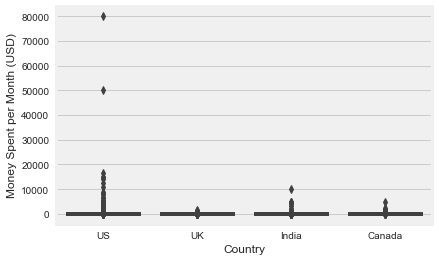

In [105]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=fcc4)
plt.xticks(range(4), ['US','UK','India','Canada'])
plt.xlabel('Country')
plt.ylabel('Money Spent per Month (USD)');

It's hard to see on the plot above if there's anything wrong with the data for the UK, India, or Canada, but we can see immediately that there's something really off for the US: two participants spend 50,000 USD or more for learning. This is extremely unlikely, so first we'll remove records where amount goes over 20,000 per month.

In [109]:
fcc4 = fcc4[fcc4['MoneyPerMonth'] <= 20000].copy()

Now let's recompute the mean values and plot the box plots again.

In [110]:
fcc4.groupby('CountryLive')['MoneyPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America   183.80
India                      135.10
Canada                     113.51
United Kingdom              45.53
Name: MoneyPerMonth, dtype: float64

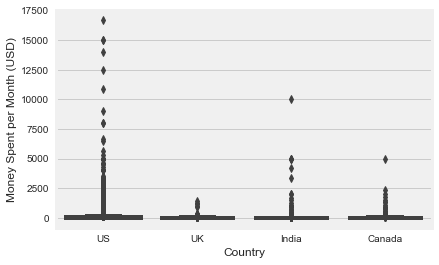

In [111]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=fcc4)
plt.xticks(range(4), ['US','UK','India','Canada'])
plt.xlabel('Country')
plt.ylabel('Money Spent per Month (USD)');

Now, we can better see outliers. Let's examine the outliers for US, India, Canada individually

#### Examine Outliers for US

In [59]:
us_outliers = fcc4[(fcc4['CountryLive'] == 'United States of America') & (fcc4['MoneyPerMonth'] > 5000)]
us_outliers.shape

(13, 137)

In [61]:
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.00,1.00,0.00,0.00,The Coding Boot Camp at UCLA Extension,1.00,nan,more than 1 million,1.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,"50,000.00",nan,nan,male,NaN,nan,0.00,0.00,0.00,nan,0.00,nan,nan,35.00,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,"44,500.00",0.00,0.00,0.00,1.00,Within the next 6 months,1.00,nan,nan,nan,1.00,1.00,nan,nan,1.00,NaN,nan,nan,1.00,work for a startup,1.00,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married","8,000.00",1.00,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,nan,1.00,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan,1.00,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,bachelor's degree,Architecture,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan,"8,000.00"
1222,32.00,1.00,0.00,0.00,The Iron Yard,1.00,nan,"between 100,000 and 1 million",nan,nan,nan,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,"50,000.00",nan,nan,female,NaN,nan,1.00,0.00,1.00,0.00,0.00,0.00,nan,50.00,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,nan,0.00,0.00,0.00,nan,Within the next 6 months,nan,nan,nan,nan,1.00,nan,nan,nan,1.00,NaN,nan,nan,1.00,work for a nonprofit,1.00,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married","13,000.00",2.00,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:1

We see that in 8 out of 13 cases, higher amount spent is due to enrollment in a bootcamp. Bootcamps are generally costly and run for few months, resulting in higher average money per month.  

Let's check the other 5 records, where participants are not enrolled in bootcamp.

In [62]:
us_outliers[us_outliers['AttendedBootcamp'] == 0]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
3930,31.00,0.00,nan,nan,NaN,nan,nan,"between 100,000 and 1 million",nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,"100,000.00",nan,nan,male,NaN,nan,1.00,0.00,1.00,0.00,0.00,1.00,nan,50.00,e1d790033545934fbe5bb5b60e368cd9,7cf1e41682462c42ce48029abf77d43c,nan,1.00,0.00,0.00,nan,Within the next 6 months,1.00,nan,nan,1.00,1.00,1.00,nan,nan,nan,NaN,nan,nan,nan,work for a startup,1.00,"DevOps / SysAdmin, Front-End Web Developer...",no preference,English,married or domestic partnership,"65,000.00",6.00,75759e5a1c,2017-03-13 10:06:46,2017-03-13 09:56:13,2017-03-13 10:10:00,2017-03-13 10:06:50,nan,nan,nan,nan,nan,nan,1.00,1.00,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,nan,nan,nan,1.00,nan,reactivex.io/learnrx/ & jafar husain,nan,nan,1.00,nan,nan,nan,nan,bachelor's degree,Biology,"40,000.00",nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan,various conf presentations,nan,nan,"10,833.33"
7198,32.00,0.00,nan,nan,NaN,nan,nan,more than 1 million,1.00,nan,nan,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,15 to 29 minutes,United States of America,United States of America,education,NaN,Employed for wages,NaN,"55,000.00",nan,nan,male,NaN,nan,1.00,0.00,1.00,0.00,0.00,1.00,nan,4.00,cb2754165344e6be79da8a4c76bf3917,272219fbd28a3a7562cb1d778e482e1e,nan,1.00,0.00,0.00,0.00,I'm already applying,1.00,nan,nan,nan,nan,1.00,nan,nan,nan,NaN,nan,nan,nan,work for a multinational corporation,0.00,"Full-Stack Web Developer, Back-End Web Developer",no preference,Spanish,"single, never married","70,000.00",5.00,439a4adaf6,2017-03-23 01:37:46,2017-03-23 01:35:01,2017-03-23 01:39:37,2017-03-23 01:37:49,nan,nan,nan,nan,nan,nan,nan,nan,nan,Na

Like we assumed earlier, it is not entirely clear from the name 'MoneyForLearning' what is meant to be filled here, and it is easy to be confuse it with money spent on one's college education or total amount they have already spent or plan to spend in near future. And it seems participants in above 5 cases may have done one of these mistakes resulting in amounts as high as  200,000 USD per month.

#### Examine outliers for India

In [63]:
india_outliers = fcc4[(fcc4['CountryLive'] == 'India') & (fcc4['MoneyPerMonth'] > 2500)]
india_outliers.shape

(6, 137)

In [64]:
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.00,0.00,nan,nan,NaN,nan,nan,"between 100,000 and 1 million",nan,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,"70,000.00",nan,nan,male,NaN,nan,0.00,0.00,1.00,nan,0.00,nan,nan,30.00,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,nan,0.00,0.00,0.00,nan,Within the next 6 months,1.00,nan,nan,nan,1.00,nan,nan,nan,1.00,NaN,1.00,nan,1.00,work for a startup,1.00,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married","20,000.00",4.00,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,nan,nan,nan,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,1.00,1.00,bachelor's degree,Computer Programming,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan,"5,000.00"
1755,20.00,0.00,nan,nan,NaN,nan,nan,more than 1 million,nan,nan,1.00,nan,nan,1.00,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,"100,000.00",nan,nan,male,NaN,nan,0.00,0.00,1.00,nan,0.00,nan,nan,10.00,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,nan,0.00,0.00,0.00,nan,I haven't decided,nan,1.00,nan,1.00,1.00,1.00,nan,1.00,nan,NaN,nan,nan,nan,work for a multinational corporation,1.00,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married","50,000.00",15.00,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,1.00,nan,nan,nan,nan,1.00,1.00,1.00,nan,1.00,nan,1.00,nan,1.00,1.00,nan,nan,NaN,1.00,nan,nan,nan,1.00,1.00,1.00,bache

None of the 6 parcipants are enrolled in bootcamp. Here as well, it seems participants may have done similar mistake in filling amount as above.

#### Examining outliers for Canada

In [67]:
canada_outliers = fcc4[(fcc4['CountryLive'] == 'Canada') & (fcc4['MoneyPerMonth'] > 2000)]
canada_outliers.shape

(2, 137)

In [68]:
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
6590,20.00,1.00,1.00,0.00,Lighthouse Labs,1.00,nan,more than 1 million,nan,nan,nan,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,Canada,Canada,NaN,NaN,Not working but looking for work,NaN,"50,000.00",nan,nan,female,NaN,nan,0.00,0.00,1.00,nan,0.00,nan,nan,10.00,054381efa7e21974d0e08e52c692ec26,42252a6541fa77d4fb490af12b7dcd30,nan,1.00,0.00,0.00,nan,I'm already applying,nan,nan,nan,nan,nan,nan,1.00,nan,1.00,NaN,nan,nan,nan,work for a medium-sized company,0.00,"Game Developer, Mobile Developer",no preference,Yue (Cantonese) Chinese,"single, never married","14,023.00",6.00,1311b3960a,2017-03-21 04:29:52,2017-03-21 04:25:29,2017-03-21 04:33:20,2017-03-21 04:29:57,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,NaN,nan,nan,nan,1.00,nan,1.00,1.00,"trade, technical, or vocational training",NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,"2,337.17"
13659,24.00,1.00,0.00,0.00,Bloc.io,1.00,nan,more than 1 million,1.00,nan,1.00,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,1.00,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,"60,000.00",nan,nan,male,NaN,nan,1.00,0.00,1.00,1.00,0.00,0.00,"250,000.00",10.00,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,"140,000.00",1.00,1.00,0.00,0.00,I haven't decided,1.00,nan,1.00,nan,1.00,1.00,1.00,nan,1.00,NaN,1.00,nan,1.00,work for a multinational corporation,nan,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married","10,000.00",2.00,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,nan,nan,nan,nan,nan,nan,nan,nan,1.00,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,nan,nan,nan,1.00,nan,nan,nan,nan,nan,

Here, both parcipants are enrolled in Bootcamps

Now, for all 3 countries we have two scenarios, where Money Spent Per Month is really high
- Scenario 1: Money is spent on months long bootcamps. We will remove these outliers, reason being if participants have already spent money on costly bootcamps, they are unlikely to enroll again in an online course. 
  
  
- Scenario 2: Money is not spent on bootcamps and it is not clear what they might understood to fill such huge amounts. Due to lack of clarity and number of such participants being small, we will also remove these outliers.

In [112]:
fcc4 = fcc4.drop(us_outliers.index).drop(india_outliers.index).drop(canada_outliers.index)

In [114]:
fcc4.groupby('CountryLive')['MoneyPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America   138.98
Canada                      83.64
India                       65.76
United Kingdom              45.53
Name: MoneyPerMonth, dtype: float64

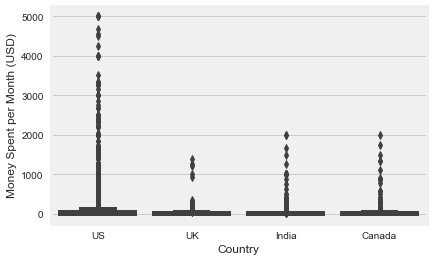

In [119]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=fcc4)
plt.xticks(range(4), ['US','UK','India','Canada'])
plt.xlabel('Country')
plt.ylabel('Money Spent per Month (USD)');

### Conclusion - Selecting the Best Markets

- US is the clear winner, where we can spend the bulk of advertising budget. Lots of new learners live here and they are willing to pay a good amount of money each month (roughly $138 on average).  


- Canada looks like the obvious second choice, but we cannnot rule out India and infact it might be a better choice because of explosive growth in online learning market and large number of potential customers.  


- The data suggests that we advertise in US, India and Canada, by splitting the advertisement budget for eg. 50% for US, 30% for India, 20% for Canada.  


- Final split can be decided by marketing team based on knowledge of and previous experience in these markets.